### To estimate the annual temperature changes of countries using the ARIMA model, to make temperature-related analyzes

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')

#to ignore the warnings, imported warnings lib

## Analyze of is there global warming ?

In [2]:
global_temp=pd.read_csv("/Users/altayavci/Documents/Data Science/UdemyProjects/TemperatureofCities/Data/GlobalTemperatures.csv")

In [3]:
global_temp["years"]=global_temp["dt"].apply(lambda x: x.split("-")[0])

#we need just years now, so thanks to lambda function and apply() method , we extracted only years into the new years column

In [4]:
dataset=global_temp.groupby("years").agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

#only the needed dataset had created

In [5]:
dataset.head()

years  LandAverageTemperature  LandAverageTemperatureUncertainty
0  1750                8.719364                           2.637818
1  1751                7.976143                           2.781143
2  1752                5.779833                           2.977000
3  1753                8.388083                           3.176000
4  1754                8.469333                           3.494250

In [6]:
dataset.isnull().values.any()

#check it out for the null or nan data

False

In [7]:
dataset["UncertainityTop"]=dataset["LandAverageTemperature"]+dataset["LandAverageTemperatureUncertainty"]
dataset["UncertainityBottom"]=dataset["LandAverageTemperature"]-dataset["LandAverageTemperatureUncertainty"]

#this new columns gives us that informations about max and min for each row 

In [8]:
dataset.head()

years  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750                8.719364                           2.637818   
1  1751                7.976143                           2.781143   
2  1752                5.779833                           2.977000   
3  1753                8.388083                           3.176000   
4  1754                8.469333                           3.494250   

   UncertainityTop  UncertainityBottom  
0        11.357182            6.081545  
1        10.757286            5.195000  
2         8.756833            2.802833  
3        11.564083            5.212083  
4        11.963583            4.975083

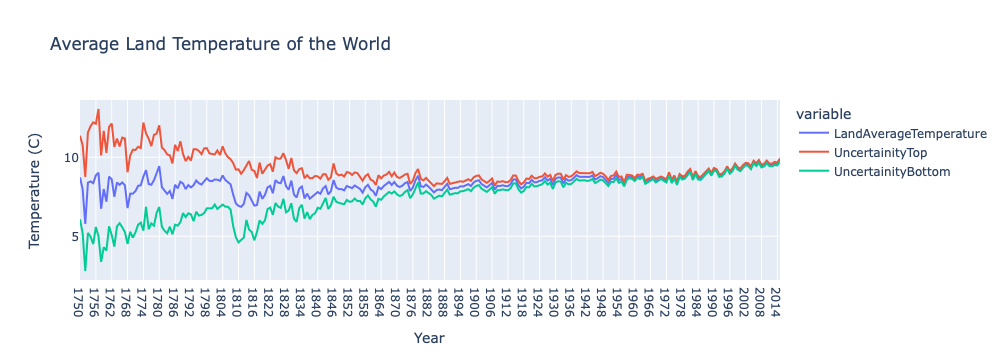

In [9]:
fig=px.line(dataset,x="years",y=['LandAverageTemperature','UncertainityTop', 'UncertainityBottom'],title="Average Land Temperature of the World")
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Temperature (C)")
fig.show()

## Analyze of the average temperature of the each season

In [10]:
global_temp["dt"]=pd.to_datetime(global_temp["dt"])
global_temp["month"]=global_temp["dt"].dt.month
#for the group by months to declare seasons, we created new columns which is name month

In [11]:
def seasonFinder(month):
    
    if month>=3 and month<=5:
        return "spring"
    
    elif month>=6 and month<=8:
        return "summer"
    
    elif month>=9 and month<=11:
        return "autumn"
    
    else:
        return "winter"
    
#clustering of the months by seasons

In [12]:
global_temp["season"]=global_temp["month"].apply(seasonFinder) 

In [13]:
years=global_temp["years"].unique()
#returns np array 

springTemps=[]
summerTemps=[]
autumnTemps=[]
winterTemps=[]

#for the new dataframe that is needed, the lists had created

In [14]:
for year in years:
    
    currentDf=global_temp[global_temp['years']==year]
    
    springTemps.append(currentDf[currentDf['season']=='spring']['LandAverageTemperature'].mean())
    
    #The line of code works like the if-else statement
    
    summerTemps.append(currentDf[currentDf['season']=='summer']['LandAverageTemperature'].mean())
    
    autumnTemps.append(currentDf[currentDf['season']=='autumn']['LandAverageTemperature'].mean())
    
    winterTemps.append(currentDf[currentDf['season']=='winter']['LandAverageTemperature'].mean())
    
    
#we calculated the average temperatures of each year according to the seasons according to the years rotating in the cycle and allocated it to the lists
    

In [15]:
season=pd.DataFrame()

season["year"]=years
season["SpringTemps"]=springTemps
season["SummerTemps"]=summerTemps
season["AutumnTemps"]=autumnTemps
season["WinterTemps"]=winterTemps

In [16]:
season.isnull().values.any() 
#for the NaN value, we imported sklearn.impute 

True

In [17]:
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(season[::])
season[::]=imputer.transform(season[::])

#SimpleImputer provides to detect nan or null data and transforms the data that which is nan or null to mean (because of that we use mean keyword)

In [18]:
season.isnull().values.any() 

False

In [19]:
season.head()


year  SpringTemps  SummerTemps  AutumnTemps  WinterTemps
0  1750.0     8.563000    14.518333     8.890000     2.963000
1  1751.0     6.735000    14.116000    10.673000     1.729000
2  1752.0     7.035500    13.803513     7.587000     2.717000
3  1753.0     8.627333    14.608333     9.212333     1.104333
4  1754.0     9.074333    14.208333     8.957333     1.637333

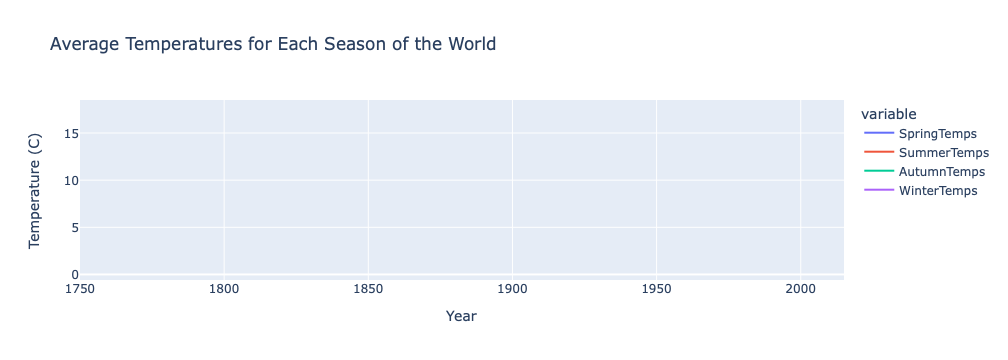

In [20]:
fig=px.line(season,x="year",y=["SpringTemps","SummerTemps","AutumnTemps","WinterTemps"],title="Average Temperatures for Each Season of the World")
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Temperature (C)")

## Data Prep for the build Time Series Analysis Model

In [21]:
cities=pd.read_csv("/Users/altayavci/Documents/Data Science/UdemyProjects/TemperatureofCities/Data/GlobalLandTemperaturesByCity.csv")

In [22]:
cities.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [23]:
cities.shape

(8599212, 7)

In [24]:
usa=cities[cities["Country"]=="United States"]

In [25]:
findingData=["New York","Los Angeles","San Francisco"]

In [26]:
usa["City"].isin(findingData).any()

#This cell of the code returns true such as if there is data in usa["City"] at leats one.

True

In [27]:
df=usa[usa["City"].isin(findingData)]
#returns that pd framework usa[usa[....]]

In [28]:
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty  \
4356748  1849-01-01               8.819                          2.558   
4356749  1849-02-01               9.577                          1.970   
4356750  1849-03-01              11.814                          2.173   
4356751  1849-04-01              13.704                          2.902   
4356752  1849-05-01              14.834                          2.017   

                City        Country Latitude Longitude  
4356748  Los Angeles  United States   34.56N   118.70W  
4356749  Los Angeles  United States   34.56N   118.70W  
4356750  Los Angeles  United States   34.56N   118.70W  
4356751  Los Angeles  United States   34.56N   118.70W  
4356752  Los Angeles  United States   34.56N   118.70W

In [29]:
df=df[["dt","AverageTemperature"]]
df.head()

#this cell of code returns datetime and average temperature as an pd framework format.

dt  AverageTemperature
4356748  1849-01-01               8.819
4356749  1849-02-01               9.577
4356750  1849-03-01              11.814
4356751  1849-04-01              13.704
4356752  1849-05-01              14.834

In [30]:
df.columns=["Date","AverageTemp"]
df.dtypes
#due to dtype is an object, we have to convert Date column to the date-time . 

Date            object
AverageTemp    float64
dtype: object

In [31]:
df["Date"]=pd.to_datetime(df["Date"])
df.dtypes

Date           datetime64[ns]
AverageTemp           float64
dtype: object

In [32]:
df.isna().sum()

Date             0
AverageTemp    120
dtype: int64

In [33]:
df.dropna(inplace=True)
#drops the null or nan data

In [34]:
df.isna().sum()

Date           0
AverageTemp    0
dtype: int64

In [35]:
df.shape

(7073, 2)

In [36]:
df.set_index('Date',inplace=True)

#the reason for doing this, when we drop the null data in the columns, we have to update index values 

In [37]:
df.head()

AverageTemp
Date                   
1849-01-01        8.819
1849-02-01        9.577
1849-03-01       11.814
1849-04-01       13.704
1849-05-01       14.834

To detect that our data is stationary or not , we have to visualize the data or there is some statistical stats that tell us the data stationary or not.

Stationary means that the mean of the data and standart deviasion should be constant at all

In [38]:
df.tail()


AverageTemp
Date                   
2013-05-01       17.434
2013-06-01       19.759
2013-07-01       20.657
2013-08-01       19.731
2013-09-01       20.471

In [39]:
df.reset_index(inplace=True)
#for the plotting

<AxesSubplot:xlabel='Date', ylabel='AverageTemp'>

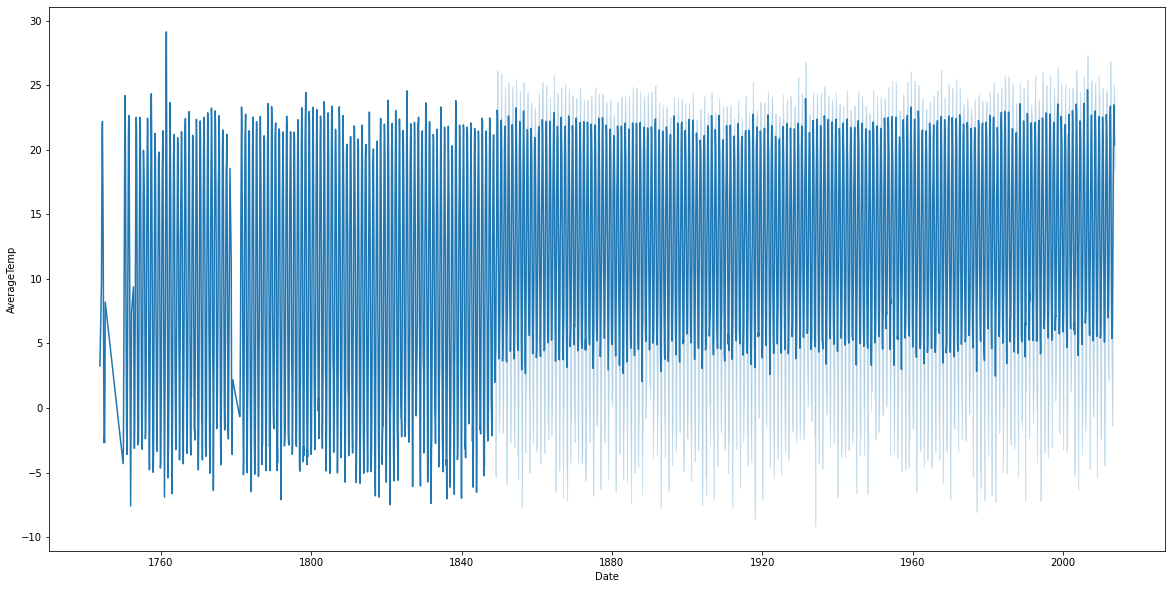

In [40]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df["Date"],y=df['AverageTemp'])

There is a lot of spikes over here so this dataset is NOT stationary !!


In [41]:
df.set_index('Date',inplace=True)
#after the plotting

In [42]:
df.index

DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=7073, freq=None)

In [43]:
from statsmodels.tsa.stattools import adfuller

#Augmented Dickey-Fuller Test

In [44]:
test_result=adfuller(df["AverageTemp"])

In [45]:
test_result

(-2.0063893036757343,
 0.2837786583333527,
 35,
 7037,
 {'1%': -3.431279613044704,
  '5%': -2.8619508146206374,
  '10%': -2.5669886726127307},
 28011.222669408726)

#### This part is very important. adfuller gives us that in order, ADF, p-value, a_lags, n_lags and critical values (%)

If the p-value is less than 0.05, our data is stationary according to Hypothesis Testing. Otherwise, the data is not stationary.

In [46]:
def adfuller_syntax(test):
    
    test_result=adfuller(test)
    
    labels=["ADF","p-value","lags used","no observation used"]
    
    for i,j in enumerate(test_result):
        
        if type(j)!=dict and i<=len(labels)-1:
            
            print("{} = {}".format(labels[i],j))
             
        elif type(j)==dict: 
            
            print("\nCritical Values")
            
            for i,k in j.items():
                
                print("{} = {}".format(i,k))
                
    if test_result[1]<=0.05:
            
        return "Data is stationary"
            
    elif test_result[1]>=0.05:
            
        return "Data is not stationary"
         

adfuller_syntax(df["AverageTemp"])  

ADF = -2.0063893036757343
p-value = 0.2837786583333527
lags used = 35
no observation used = 7037

Critical Values
1% = -3.431279613044704
5% = -2.8619508146206374
10% = -2.5669886726127307


'Data is not stationary'

### Updating the dataset not stationary to stationary

In [47]:
dfCopy=df.copy()

#we have to make stationary our dataset so we created copy of the original dataset

In [48]:
dfCopy.head(24)

AverageTemp
Date                   
1849-01-01        8.819
1849-02-01        9.577
1849-03-01       11.814
1849-04-01       13.704
1849-05-01       14.834
1849-06-01       21.173
1849-07-01       26.159
1849-08-01       26.099
1849-09-01       21.848
1849-10-01       16.549
1849-11-01       10.907
1849-12-01        7.032
1850-01-01        7.087
1850-02-01        8.575
1850-03-01       10.365
1850-04-01       13.735
1850-05-01       16.633
1850-06-01       20.241
1850-07-01       23.445
1850-08-01       25.935
1850-09-01       22.562
1850-10-01       17.577
1850-11-01       10.931
1850-12-01        6.253

In [49]:
dfCopy["FirstTempDifference"]=dfCopy["AverageTemp"]-dfCopy["AverageTemp"].shift(12)
#FOR THE STATIONARY !
#12 because of the period
#We shifted the rows one by one using the shift method and subtracted them from each other to detect the fluctuations between the data.

In [50]:
dfCopy.head(13)

AverageTemp  FirstTempDifference
Date                                        
1849-01-01        8.819                  NaN
1849-02-01        9.577                  NaN
1849-03-01       11.814                  NaN
1849-04-01       13.704                  NaN
1849-05-01       14.834                  NaN
1849-06-01       21.173                  NaN
1849-07-01       26.159                  NaN
1849-08-01       26.099                  NaN
1849-09-01       21.848                  NaN
1849-10-01       16.549                  NaN
1849-11-01       10.907                  NaN
1849-12-01        7.032                  NaN
1850-01-01        7.087               -1.732

In [51]:
adfuller_syntax(dfCopy["FirstTempDifference"].dropna())

ADF = -21.239650404910822
p-value = 0.0
lags used = 35
no observation used = 7025

Critical Values
1% = -3.43128120157662
5% = -2.8619515165147282
10% = -2.566989046243082


'Data is stationary'

<AxesSubplot:xlabel='Date'>

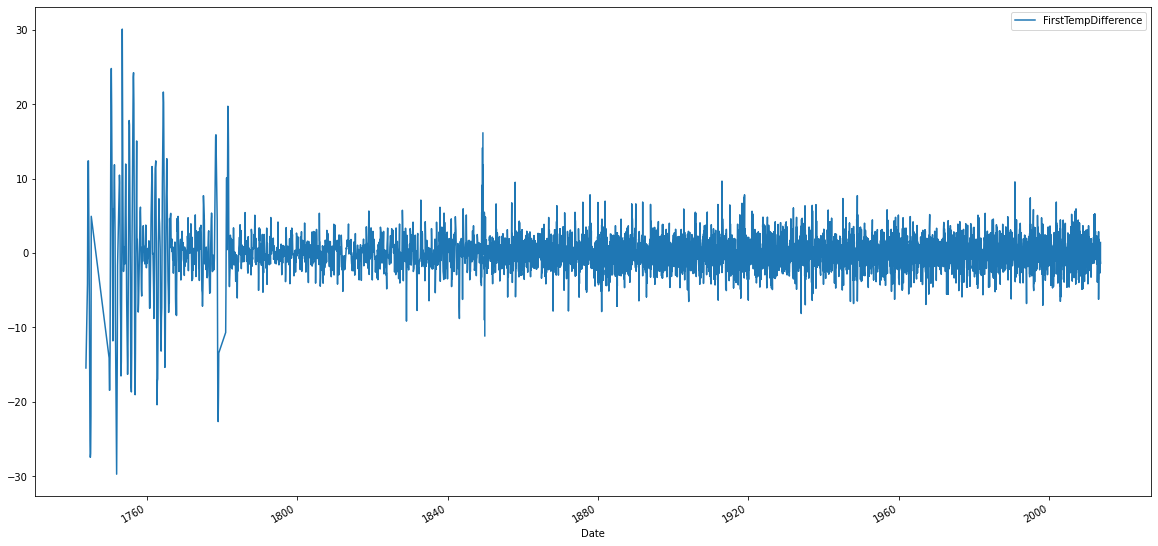

In [52]:
dfCopy[["FirstTempDifference"]].plot(figsize=(20,10))

Now, there is less more spikes than the previous fig and p-value is less than the 0.05. Thats why our dataset is stationary.

In [53]:
df["Month"]=df.index.month

df["Year"]=df.index.year

In [54]:
pivot=df.pivot_table(values="AverageTemp",index="Month",columns="Year")

In [55]:
pivot.head()

Year   1743    1744   1745    1750   1751   1752    1753   1754    1755  \
Month                                                                     
1       NaN     NaN -2.363  -4.310 -3.591 -7.588  -3.122 -2.252  -3.193   
2       NaN     NaN -2.671  -2.719 -2.051    NaN  -1.467 -2.583  -1.802   
3       NaN     NaN  1.363   2.773  3.256  3.322   4.207  2.728   1.112   
4       NaN   9.788  8.209   8.848  7.992  7.402   8.099    NaN   8.714   
5       NaN  15.708    NaN  15.411    NaN    NaN  15.330    NaN  15.238   

Year    1756  ...       2004       2005       2006    2007       2008  \
Month         ...                                                       
1     -1.985  ...   4.080333   4.923000   7.135333   5.656   5.216333   
2      0.259  ...   6.100000   7.297000   7.547667   5.634   6.754333   
3        NaN  ...  12.184000   9.124667   7.527333  10.586   9.733667   
4        NaN  ...  13.806333  12.546000  12.051667  12.342  13.113000   
5        NaN  ...  17.817333  15.982333  17.123333  17.150  15.800333   

Year        2009       2010       2011       2012       2013  
Month                                                         
1       5.550333   5.776667   5.109333   7.177667   5.388333  
2       6.540667   6.788000   5.777333   7.970000   6.222667  
3       9.211000  10.486667   9.115000  10.604333  10.162333  
4      12.744000  12.254000  12.710000  13.075000  13.880000  
5      17.565667  15.856333  15.724000  17.670333  17.335333  

[5 rows x 266 columns]

Text(0, 0.5, 'Temperature')

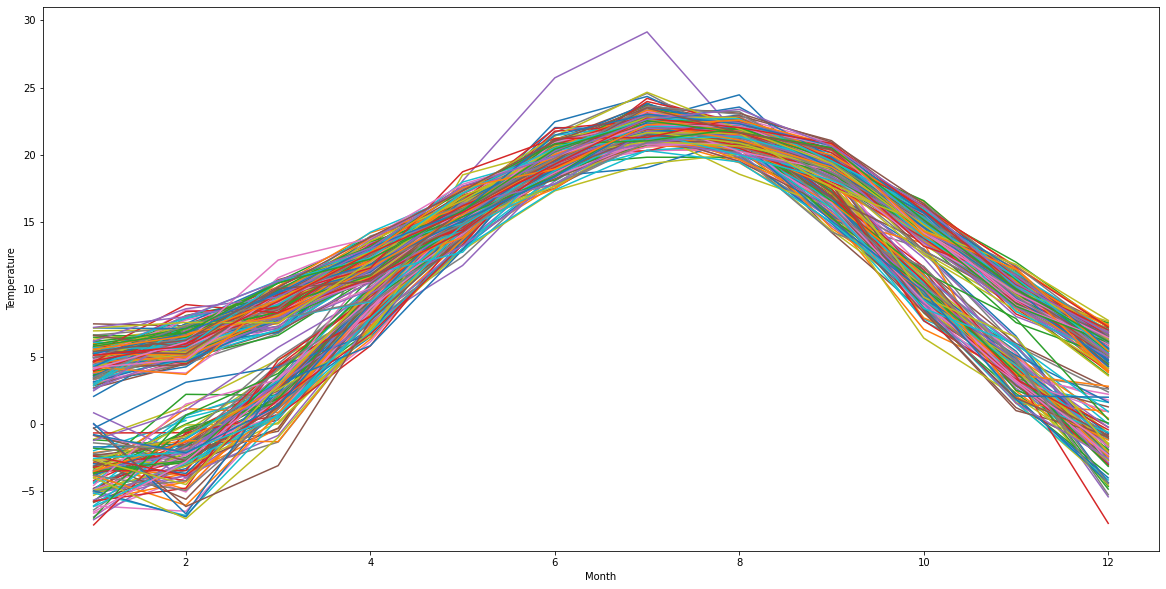

In [56]:
pivot.plot(figsize=(20,10))
plt.legend().remove()
plt.xlabel("Month")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='Month'>

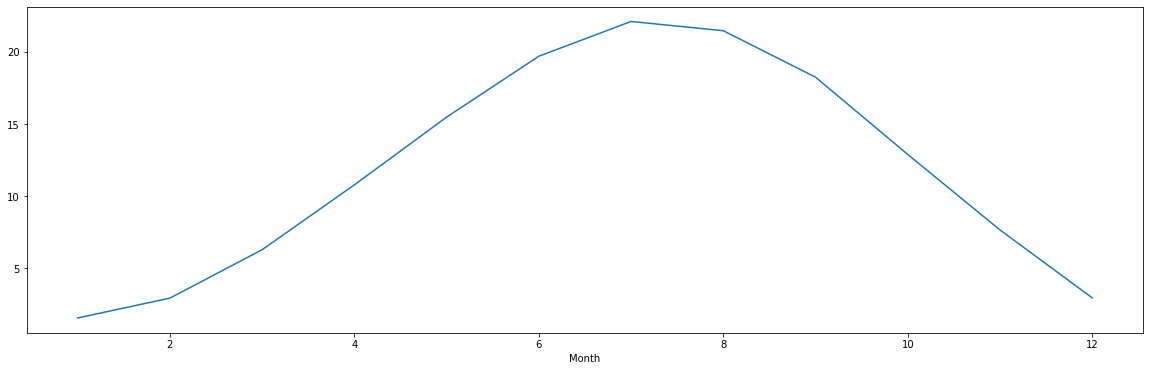

In [57]:
monthly=pivot.mean(axis=1)
monthly.plot(figsize=(20,6))

## Building the Time Series Model Using Moving Average

In [58]:
dfCopy=dfCopy[["FirstTempDifference"]]

In [59]:
dfCopy.dropna(inplace=True)

In [60]:
dfCopy.head()

FirstTempDifference
Date                           
1850-01-01               -1.732
1850-02-01               -1.002
1850-03-01               -1.449
1850-04-01                0.031
1850-05-01                1.799

In [61]:
dfCopy["FirstTempDifference"].rolling(window=5).mean().head(15)
#The rolling method groups data according to the number in the window argument.
#Here we got window=5 and k. We averaged the data from index to index k+4. For the stationary


Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
1850-06-01   -0.3106
1850-07-01   -0.6530
1850-08-01   -0.3960
1850-09-01   -0.2594
1850-10-01   -0.4136
1850-11-01   -0.2224
1850-12-01    0.1646
1851-01-01    0.2898
1851-02-01    0.0474
1851-03-01   -0.0266
Name: FirstTempDifference, dtype: float64

In [62]:
value=pd.DataFrame(dfCopy["FirstTempDifference"])

In [63]:
tempDf=pd.concat([value,dfCopy["FirstTempDifference"].rolling(window=5).mean()],axis=1)
#We used pd.concat to join two tables with the same indexes

In [64]:
tempDf.columns=["ActualTemp","ForecastTemp"]

In [65]:
tempDf

ActualTemp  ForecastTemp
Date                                
1850-01-01      -1.732           NaN
1850-02-01      -1.002           NaN
1850-03-01      -1.449           NaN
1850-04-01       0.031           NaN
1850-05-01       1.799       -0.4706
...                ...           ...
2013-05-01       0.879        0.4336
2013-06-01       1.277        1.0236
2013-07-01       1.025        1.4060
2013-08-01      -0.800        0.8454
2013-09-01       1.426        0.7614

[7061 rows x 2 columns]

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
root_mean_square=np.sqrt(mean_squared_error(tempDf["ForecastTemp"][4:],tempDf["ActualTemp"][4:]))
#If there are outliers in the dataset, the rms will increase even more.
#rms represents the margin of error in each of our estimated values

In [68]:
root_mean_square

2.3934235122562058

## ARIMA MODEL

The ARIMA model is a model based on Auto-ML. The basic concepts of the ARIMA model are AR=autocorrelation(ACF), MA=partial autocorrelation(PACF), I=differencing. As the correlation coefficient increases, the dependence of the data on each other increases. they are more fit to the fit-line that is formed when we apply it. Also, correlation favors randomness, that is, the independence of randomly selected data in a system will be much more than sequential data. k in the dataset in autocorrelation. index, k+1. It is used to test its dependency according to the index depending on the delay, that is, the lag. this is called the q value. n falling below 0.1. the index becomes q=n. In partial correlation, besides k and k+1, the relationship between k and k+2 is also checked, depending on the delay. is more complicated. in this case, k.<=0.1 => p=k. differincing is also the case of making data stationary. The aim is to observe the straight line. The shift() method, which we used to make our dataset stationary, gives us the d coefficient here. Suppose we say d=1, the operation is performed according to shift(1). If we give d=1 k+1.-k. If the indices still represent a trend, then d=1 or 2. In this case, we need to say shift(2). k+2. - k. If the indices represent a distorted trend then d will definitely take the value 2. (trend=linear relationship, dependency)

ARIMA modeli, Auto-ML'e dayanan bir modeldir.ARIMA modelinin temel kavramları AR=autokorelasyon(ACF) ,MA=partial autokorelasyon(PACF), I=differencingtir.korelasyon katsayısı arttıkca verilerin birbirlerine bagımlılıgı artar.Yani verisetimizdeki veriler, basit lineer regresyon uyguladıgımızda olusan fit-line'a daha cok fit olurlar.Ayrıca korelasyon rassallıktan yanadır yani bir sistemde rastgele secilen verilerin birbirlerinden bagımsızlıgı sıralı verilere nazaran cok daha fazla olacaktır. autokorelasyon'da verisetindeki k. index, k+1. indexe göre bagımlıgını gecikmeye yani laga baglı test etmek kullanılır. buna q değeri denir. 0.1'in altına düşen n. index q=n olur. kısmi yani partial korelasyonda ise k ve k+1 in dısında k ile k+2 nin de ilişkisine gecikemeye bağlı olarak işikisine bakılır. daha komplikedir. bu durumda da k.<=0.1 => p=k durumu olur. differincing de verileri stationary haline getirme durumudur. amac straight line gözlemektir. Öncesinde verisetimizi stationary yapmak için kullandıgımız shift() methodu bize burdaki d katsayısını verir.Farz edelim, d=1 dersek shift(1)' e göre işlem yapılır. Eğer ki d=1 verdiğimizde k+1.-k. indeksler hala bir trendi ifade ediyorsa bu durumda d=1 veya 2 olabilir.Bu durumda shift(2) dememiz gerekir. k+2. - k. indeksler bozuk bir trendi temsil ediyorsa işte o zaman d kesinlike 2 değerini alır. (trend=doğrusal ilişki, bagımlılık)

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

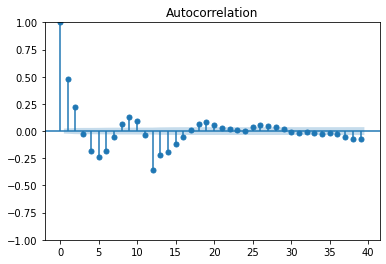

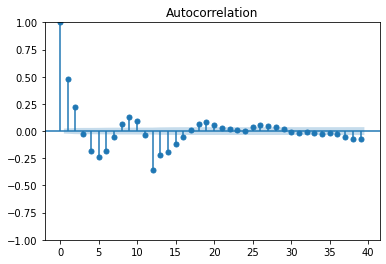

In [70]:
plot_acf(dfCopy["FirstTempDifference"].dropna())
#y axis presents correlations, x axis presents lags (index)
#q value is 3 (first one that inside the blue blur line inside of which data has correlation 1 )

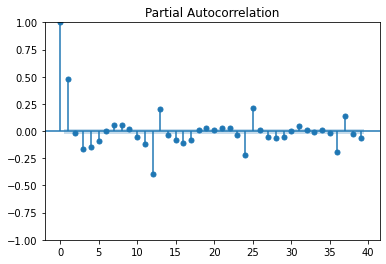

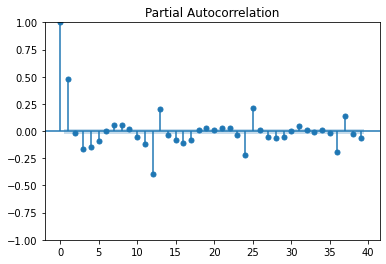

In [71]:
plot_pacf(dfCopy["FirstTempDifference"].dropna())
#as it seen in the graph, p value is 2 (first one whih correlation is 1 instead of this)

In [72]:
training_data=dfCopy[0:6000]
test_data=dfCopy[6000:]
#we dont need the train_test_split method to do this because all of the data that we use in the model just in the one case

In [73]:
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

In [74]:
dfCopy.dropna(inplace=True)

In [75]:
dfCopy.isna().any()

FirstTempDifference    False
dtype: bool

In [76]:
arima=sm.tsa.arima.ARIMA(training_data, order=(2,1,3))
#(p,d,q)=(2,1,3)

In [77]:
model=arima.fit()

In [78]:
predictions=model.forecast(steps=len(test_data))

In [79]:
predictions

6000   -0.626756
6001    0.006960
6002   -0.285226
6003    0.126887
6004   -0.187028
          ...   
7056   -0.003597
7057   -0.003597
7058   -0.003597
7059   -0.003597
7060   -0.003597
Name: predicted_mean, Length: 1061, dtype: float64

In [80]:
np.sqrt(mean_squared_error(test_data,predictions))

1.5109236913680135

ARIMA Model provides less mean squared error so this is very cool. 

### Cross Validiation

In [81]:
p_values=range(0,4)
q_values=range(0,4)
d_values=range(0,3)

In [ ]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            
            order=(p,d,q)
            
            training_data=dfCopy[0:6000]
            
            test_data=dfCopy[6000:]
            
            predictions=[]
            
            for _ in range(len(test_data)):
                
                try:
                    
                    arima=sm.tsa.arima.ARIMA(training_data,order)
                
                    model=arima.fit()
                
                    predictions.append(model.forecast())
                
                    error=mean_squared_error(test_data,predictions)
                
                    print('MSE is {} with order {}'.format(error,order))
        
                except:
                    
                    continue
            

There are minor problems with this part(cross validiation) of the code because of arima() method.